<a href="https://colab.research.google.com/github/Ashirbad484/weather-prediction-lstm/blob/main/Weather_Prediction_Using_LSTM_(Python_code)_by%2C_Ashirbad_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.3405 - val_loss: 0.0631
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0744 - val_loss: 0.0050
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - val_loss: 0.0056
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - val_loss: 0.0047
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - val_loss: 0.0046
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - val_loss: 0.0053
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - val_

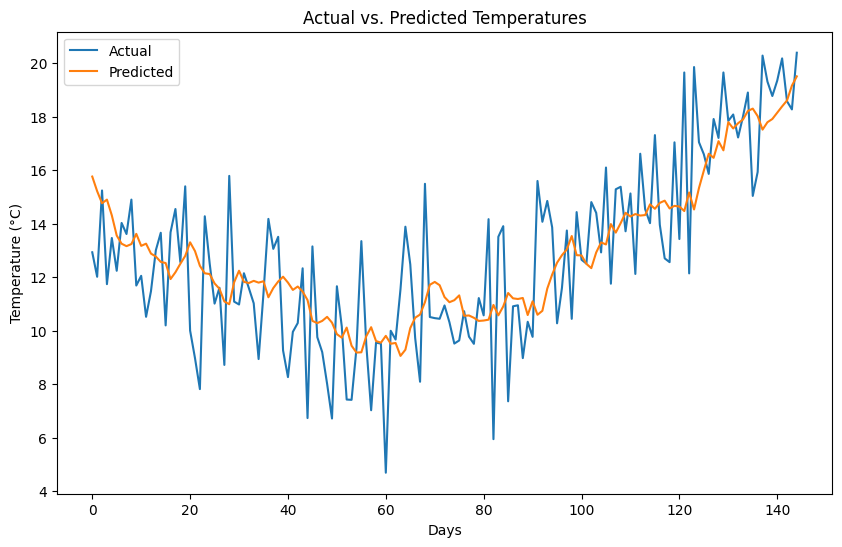

In [1]:

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# 2. Simulate Data (or load your own CSV)
dates = pd.date_range(start="2024-01-01", end="2025-12-31", freq="D")
np.random.seed(42)
temps = 20 + 10 * np.sin(2 * np.pi * dates.dayofyear / 365) + np.random.normal(0, 2, len(dates))
df = pd.DataFrame({"date": dates, "temp": temps})
df.to_csv("weather_data.csv", index=False)

# 3. Preprocess
data = df[["temp"]].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)

# 4. Create sequences
sequence_length = 7  # Use past week to predict next day
X, y = [], []
for i in range(sequence_length, len(scaled)):
    X.append(scaled[i-sequence_length:i])
    y.append(scaled[i])
X, y = np.array(X), np.array(y)

# 5. Split
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# 6. Build Model
model = Sequential([
    LSTM(50, activation="relu", input_shape=(sequence_length, 1)),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

# 7. Predict & Plot
preds = model.predict(X_test)
preds = scaler.inverse_transform(preds)
actual = scaler.inverse_transform(y_test)

plt.figure(figsize=(10, 6))
plt.plot(actual, label="Actual")
plt.plot(preds, label="Predicted")
plt.title("Actual vs. Predicted Temperatures")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()